In [ ]:
pip install -U fortran-magic

In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
l1 = ["car", 23, 45, 4.6, "plane", 9.3, "boat"]
l1

['car', 23, 45, 4.6, 'plane', 9.3, 'boat']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
first1 = l1[0]
second1 = l1[1]
print("first:", first1)
print("second:", second1)

first: car
second: 23


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
last1 = l1[-1]
antepenultimate1 = l1[-3]
print("last:", last1)
print("second to last:", antepenultimate1)

last: boat
second to last: plane


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
sublist1 = l1[2:5]
sublist1

[45, 4.6, 'plane']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
first_two1 = l1[:2]
first_two1

['car', 23]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
after_four1 = l1[4:]
after_four1

['plane', 9.3, 'boat']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
l2 = [1, 2, 3, 4, 5, 6, 7 , 8, 9, 10]
l2[2:8:4]

[3, 7]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
l2[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
l3 = ["apple", "pear", "banana", "cherry"]
print("Before:", l3)
l3.append("grape")
print("After:", l3)

Before: ['apple', 'pear', 'banana', 'cherry']
After: ['apple', 'pear', 'banana', 'cherry', 'grape']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
l4 = ["a", "b", "c", "d"]
[x * 3 for x in l4]

['aaa', 'bbb', 'ccc', 'ddd']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
actors = {"Brad": "Pitt", "Johnny": "Deep", "J.k": "Simmons", "Leonardo": "Dicaprio"}
actors

{'Brad': 'Pitt', 'J.k': 'Simmons', 'Johnny': 'Deep', 'Leonardo': 'Dicaprio'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
actors['Joaquin'] = 'Fenix'
actors

{'Brad': 'Pitt',
 'J.k': 'Simmons',
 'Joaquin': 'Fenix',
 'Johnny': 'Deep',
 'Leonardo': 'Dicaprio'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
del actors['Brad']
actors

{'J.k': 'Simmons',
 'Joaquin': 'Fenix',
 'Johnny': 'Deep',
 'Leonardo': 'Dicaprio'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
actors['Brad':'Joaquin']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
c = [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18],
     [19, 20, 21],
     [22, 23, 24]]

d = [[1, 2, 3, 4, 5],
     [2, 9, 7, 8, 6]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time

matmul(c, d)

CPU times: user 75 µs, sys: 0 ns, total: 75 µs
Wall time: 80.6 µs


[[32, 119, 107, 128, 116],
 [41, 152, 137, 164, 149],
 [50, 185, 167, 200, 182],
 [59, 218, 197, 236, 215],
 [68, 251, 227, 272, 248]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.23892489283900686, 0.9511281079188317, 0.34435867792475894],
 [0.7308104867801094, 0.8502569807504732, 0.5568884708885976]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.99 s, sys: 4 ms, total: 5.99 s
Wall time: 5.99 s


In [ ]:
%%time
randa1 = random_matrix(800, 60)
randb1 = random_matrix(60, 500)
y = matmul(randa1, randb1)

CPU times: user 5.83 s, sys: 13.7 ms, total: 5.84 s
Wall time: 5.85 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
list_data1 = [float(i) for i in range(50000)]
array_data1 = np.array(list_data1)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
python_dot_product(list_data1, list_data1)

CPU times: user 7.21 ms, sys: 0 ns, total: 7.21 ms
Wall time: 7.35 ms


41665416675000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 181 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data1, array_data1)

CPU times: user 95 µs, sys: 9 µs, total: 104 µs
Wall time: 108 µs


41665416675000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
mul_elemwise([10, 45, 34, 64], [3, 2 + 0j, 4.5, "seven"])

[30,
 (90+0j),
 153.0,
 'sevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevenseven']

In [ ]:
import py_compile

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
source_code = 'd - b / 4 + e * f'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (d)
              2 LOAD_NAME                1 (b)
              4 LOAD_CONST               0 (4)
              6 BINARY_TRUE_DIVIDE
              8 BINARY_SUBTRACT
             10 LOAD_NAME                2 (e)
             12 LOAD_NAME                3 (f)
             14 BINARY_MULTIPLY
             16 BINARY_ADD
             18 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data1 = np.array([13, 45, 63, 24, 62, 4])
data1

array([13, 45, 63, 24, 62,  4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
data1 + data1

array([ 26,  90, 126,  48, 124,   8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 2.06 ms, sys: 0 ns, total: 2.06 ms
Wall time: 1.94 ms


333328333350000.0

In [ ]:
%%time
(array_data1 * array_data1).sum()

CPU times: user 1.2 ms, sys: 19 µs, total: 1.22 ms
Wall time: 2.62 ms


41665416675000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
array_data1.dot(array_data1)

CPU times: user 0 ns, sys: 3.52 ms, total: 3.52 ms
Wall time: 6.05 ms


41665416675000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data1, array_data1)

CPU times: user 93 µs, sys: 10 µs, total: 103 µs
Wall time: 109 µs


41665416675000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
np.append(data, 3)

array([1, 2, 3, 4, 3])

In [ ]:
np.append(data, [5, 4, 3])

array([1, 2, 3, 4, 5, 4, 3])

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
three_by_two = data1.reshape(3, 2)
three_by_two

array([[13, 45],
       [63, 24],
       [62,  4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
arr = np.array([10, 21, 34, 45, 56, 67, 78, 89, 91], dtype='int16').reshape(3, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[10 21 34]
 [45 56 67]
 [78 89 91]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\n\x00\x15\x00"\x00-\x008\x00C\x00N\x00Y\x00[\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data1 = np.arange(24).reshape(6, 4)
data1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
data1*data1

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361],
       [400, 441, 484, 529]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
np.sqrt(data1)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335],
       [4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
(data1 % 8) == 3

array([[False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
(((data1 % 2) == 1) & ((data1 % 3) == 0)) | ((data1 % 4) == 1)

array([[False,  True, False,  True],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False],
       [False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
data1 @ data1.T

array([[  14,   38,   62,   86,  110,  134],
       [  38,  126,  214,  302,  390,  478],
       [  62,  214,  366,  518,  670,  822],
       [  86,  302,  518,  734,  950, 1166],
       [ 110,  390,  670,  950, 1230, 1510],
       [ 134,  478,  822, 1166, 1510, 1854]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines1 = np.sin(np.linspace(0, 4.23, 32))
cosines1 = np.cos(np.linspace(0, 3.45, 43))
cosines1

array([ 1.        ,  0.99662817,  0.98653543,  0.96978983,  0.9465043 ,
        0.91683587,  0.88098461,  0.8391923 ,  0.79174077,  0.73895   ,
        0.68117602,  0.61880841,  0.55226778,  0.48200284,  0.40848744,
        0.33221734,  0.25370688,  0.17348551,  0.09209422,  0.01008187,
       -0.07199847, -0.15359327, -0.23415229, -0.31313228, -0.3900006 ,
       -0.4642389 , -0.53534652, -0.60284396, -0.66627602, -0.72521495,
       -0.77926327, -0.82805652, -0.87126563, -0.90859923, -0.93980555,
       -0.96467415, -0.98303731, -0.99477121, -0.99979671, -0.99807993,
       -0.98963244, -0.97451121, -0.95281821])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
cosines1[3]

0.9697898261192058

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines1[:5]

array([0.        , 0.13602857, 0.26952835, 0.39801755, 0.51910754])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines1[7:]

array([ 0.81640689,  0.88737171,  0.94184013,  0.97879958,  0.99756297,
        0.99778151,  0.97945111,  0.94291255,  0.88884508,  0.81825383,
        0.7324511 ,  0.63303198,  0.52184469,  0.40095621,  0.27261389,
        0.13920363,  0.00320555, -0.13285212, -0.26644005, -0.39507481,
       -0.51636506, -0.628056  , -0.72807127, -0.81455157, -0.88588921])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
sines1[::5]

array([ 0.        ,  0.63054723,  0.97879958,  0.88884508,  0.40095621,
       -0.26644005, -0.81455157])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
print("cosines:\n", cosines1)
print("cosines > 0.88:\n", cosines1 > 0.88)
print("cosines[cosines > 0.78]:\n", cosines1[cosines1 > 0.78])

cosines:
 [ 1.          0.99662817  0.98653543  0.96978983  0.9465043   0.91683587
  0.88098461  0.8391923   0.79174077  0.73895     0.68117602  0.61880841
  0.55226778  0.48200284  0.40848744  0.33221734  0.25370688  0.17348551
  0.09209422  0.01008187 -0.07199847 -0.15359327 -0.23415229 -0.31313228
 -0.3900006  -0.4642389  -0.53534652 -0.60284396 -0.66627602 -0.72521495
 -0.77926327 -0.82805652 -0.87126563 -0.90859923 -0.93980555 -0.96467415
 -0.98303731 -0.99477121 -0.99979671 -0.99807993 -0.98963244 -0.97451121
 -0.95281821]
cosines > 0.88:
 [ True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
cosines[cosines > 0.78]:
 [1.         0.99662817 0.98653543 0.96978983 0.9465043  0.91683587
 0.88098461 0.8391923  0.79174077]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
print(sines1)
sines1[[0, 1, 2, 8, 10]]

[ 0.          0.13602857  0.26952835  0.39801755  0.51910754  0.63054723
  0.73026494  0.81640689  0.88737171  0.94184013  0.97879958  0.99756297
  0.99778151  0.97945111  0.94291255  0.88884508  0.81825383  0.7324511
  0.63303198  0.52184469  0.40095621  0.27261389  0.13920363  0.00320555
 -0.13285212 -0.26644005 -0.39507481 -0.51636506 -0.628056   -0.72807127
 -0.81455157 -0.88588921]


array([0.        , 0.13602857, 0.26952835, 0.88737171, 0.97879958])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
unsorted_data1 = np.array([12, -53, 28, -142, -10, 5, 2, 23, 100])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
sort_indices1 = np.argsort(unsorted_data1)
sort_indices1

array([3, 1, 4, 6, 5, 0, 7, 2, 8])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
unsorted_data1[sort_indices1]

array([-142,  -53,  -10,    2,    5,   12,   23,   28,  100])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
market_caps1 = np.array([18, 61, 14, 15, 8, 16])
assets1 = np.array(['c', 'v', 'x', 'f', 'z', 'p'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
sort_by_mcap1 = np.argsort(market_caps1)
assets1[sort_by_mcap1]

array(['z', 'x', 'f', 'p', 'c', 'v'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data1 = np.arange(45).reshape(9, 5)
data1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data1[:3, :7] 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data1[:3, [1, -3]]

array([[ 1,  2],
       [ 6,  7],
       [11, 12]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
data1[(data1[:, 0] % 4) == 0]

array([[ 0,  1,  2,  3,  4],
       [20, 21, 22, 23, 24],
       [40, 41, 42, 43, 44]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

In [ ]:
variance(np.random.standard_normal(10000))

0.9998155864200254

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
data1 = np.arange(56)
data1.mean()

27.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data1 = np.arange(42).reshape(6, 7)
data1

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41]])

In [ ]:
data.mean()

14.5

In [ ]:
data1.mean()

20.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data1.mean(axis=0)

array([17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

In [ ]:
data1.mean(axis=1)

array([ 3., 10., 17., 24., 31., 38.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row1 = np.array([23, 34, 56, 78, 91])
column1 = np.array([[5], [6], [7], [8]])
print("Row:\n", row1, sep='')
print("Column:\n", column1, sep='')

Row:
[23 34 56 78 91]
Column:
[[5]
 [6]
 [7]
 [8]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
row1 + column1

array([[28, 39, 61, 83, 96],
       [29, 40, 62, 84, 97],
       [30, 41, 63, 85, 98],
       [31, 42, 64, 86, 99]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
print("Data:\n", data1, sep='')
print("Mean:\n", data1.mean(axis=1), sep='')
print("Data - Mean:\n", data1 - data1.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]]
Mean:
[ 3. 10. 17. 24. 31. 38.]
Data - Mean:
[[-17.5 -17.5 -17.5 -17.5 -17.5 -17.5 -17.5]
 [-10.5 -10.5 -10.5 -10.5 -10.5 -10.5 -10.5]
 [ -3.5  -3.5  -3.5  -3.5  -3.5  -3.5  -3.5]
 [  3.5   3.5   3.5   3.5   3.5   3.5   3.5]
 [ 10.5  10.5  10.5  10.5  10.5  10.5  10.5]
 [ 17.5  17.5  17.5  17.5  17.5  17.5  17.5]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
s1 = pd.Series(index=['as', 'es', 'is', 'os', 'us'], data=[34, 23, 32, 44, 65])
s1

as    34
es    23
is    32
os    44
us    65
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
print("The index is:", s1.index)
print("The values are:", s1.values)

The index is: Index(['as', 'es', 'is', 'os', 'us'], dtype='object')
The values are: [34 23 32 44 65]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
s1.iloc[1]

23

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
s1.loc["us"]

65

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
s1.iloc[:5]

as    34
es    23
is    32
os    44
us    65
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
s1.loc[:'es']

as    34
es    23
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
s1.iloc[[1, -2]]

es    23
os    44
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
s1.loc[s1 >= 32]

as    34
is    32
os    44
us    65
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
other_s1 = pd.Series({'as': 12.2, 'es': 23.3, 'is': 34.4, 'os': 45.5})
other_s1

as    12.2
es    23.3
is    34.4
os    45.5
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
s1 + other_s1

as    46.2
es    46.3
is    66.4
os    89.5
us     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
(s1 + other_s1).fillna(0.0)

as    46.2
es    46.3
is    66.4
os    89.5
us     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
goog = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,325.250885,332.827484,324.966949,331.462585,331.462585,7380561
2012-01-04,331.273315,333.873566,329.076538,332.892242,332.892242,5749470
2012-01-05,329.828735,330.745270,326.889740,328.274536,328.274536,6590410
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987
2012-01-09,322.042908,322.291962,309.455078,310.067780,310.067780,11688849


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
goog.iloc[:4, :2]

,Open,High
Date,,
2012-01-03,325.250885,332.827484
2012-01-04,331.273315,333.873566
2012-01-05,329.828735,330.745270
2012-01-06,328.344299,328.767700


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
goog.loc[pd.Timestamp('2012-02-03'):pd.Timestamp('2012-03-05'), ['Close', 'Volume']]

,Close,Volume
Date,,
2012-02-03,297.051575,6360753
2012-02-06,303.407745,7386784
2012-02-07,302.252075,4199883
2012-02-08,303.786346,3686567
2012-02-09,304.588318,4546377
2012-02-10,301.823700,4667831
2012-02-13,304.956940,3646216
2012-02-14,303.741516,3620921
2012-02-15,301.649353,4869986


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

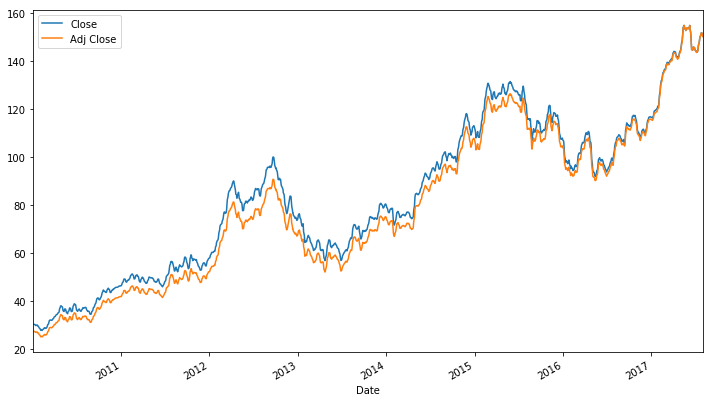

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

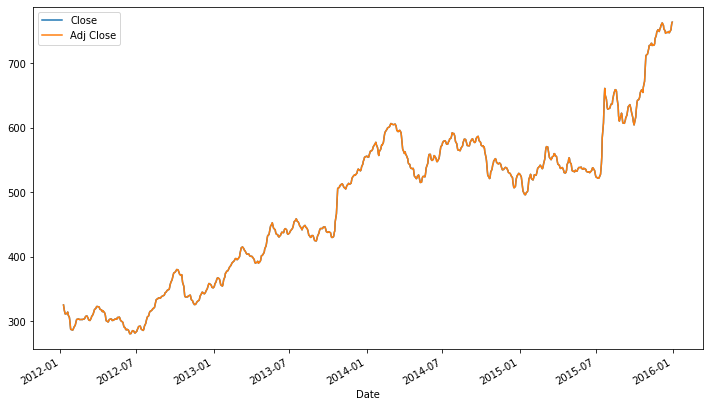

In [ ]:
goog.rolling(5)[['Close', 'Adj Close']].mean().plot();

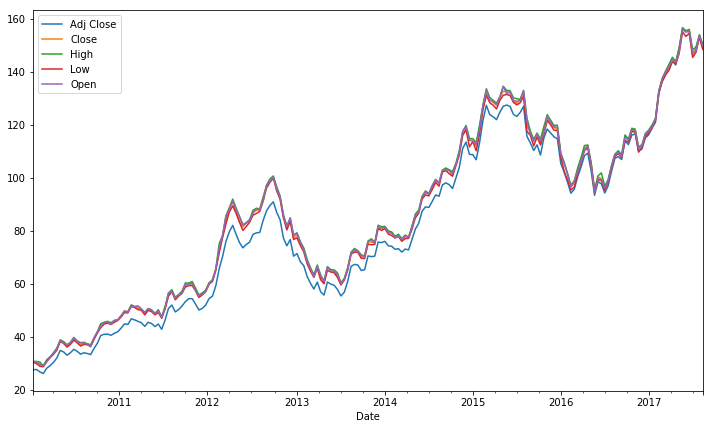

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

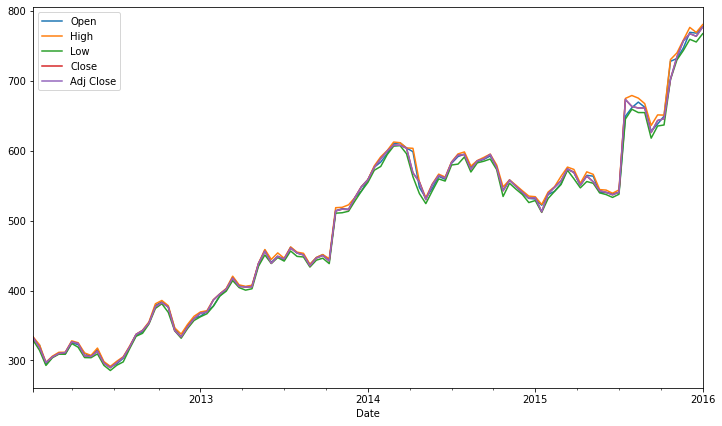

In [ ]:
goog.drop('Volume', axis=1).resample('2W').max().plot();

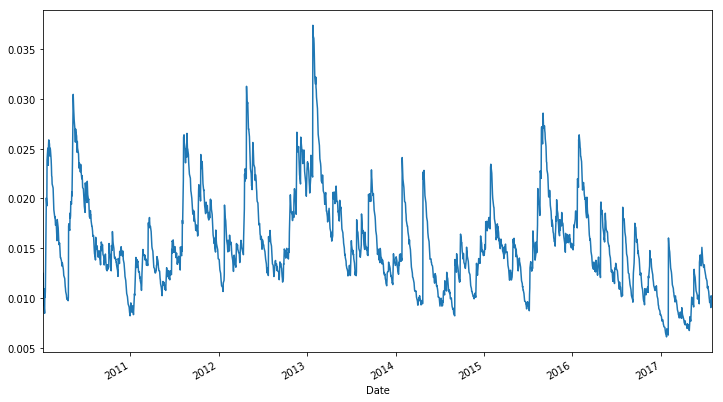

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

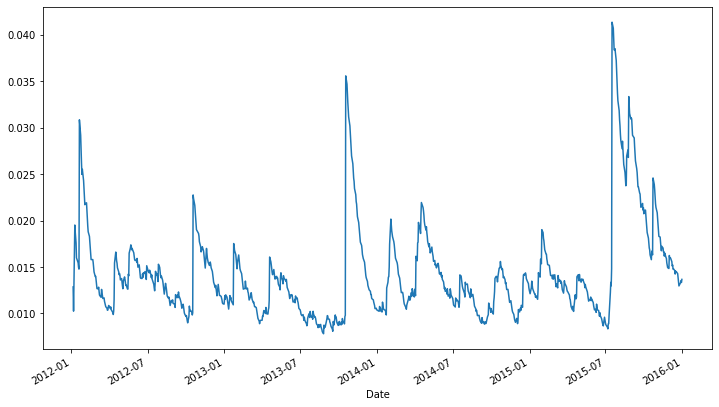

In [ ]:
goog['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv("cars.csv")
cars = cars.rename(columns={"Unnamed: 0": "Cars"})
cars

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
cars.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

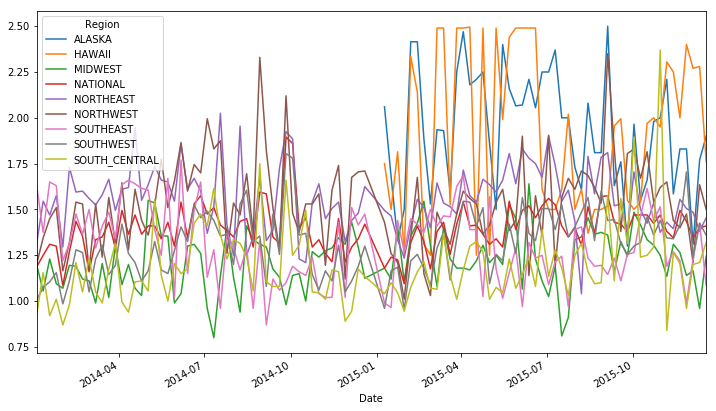

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

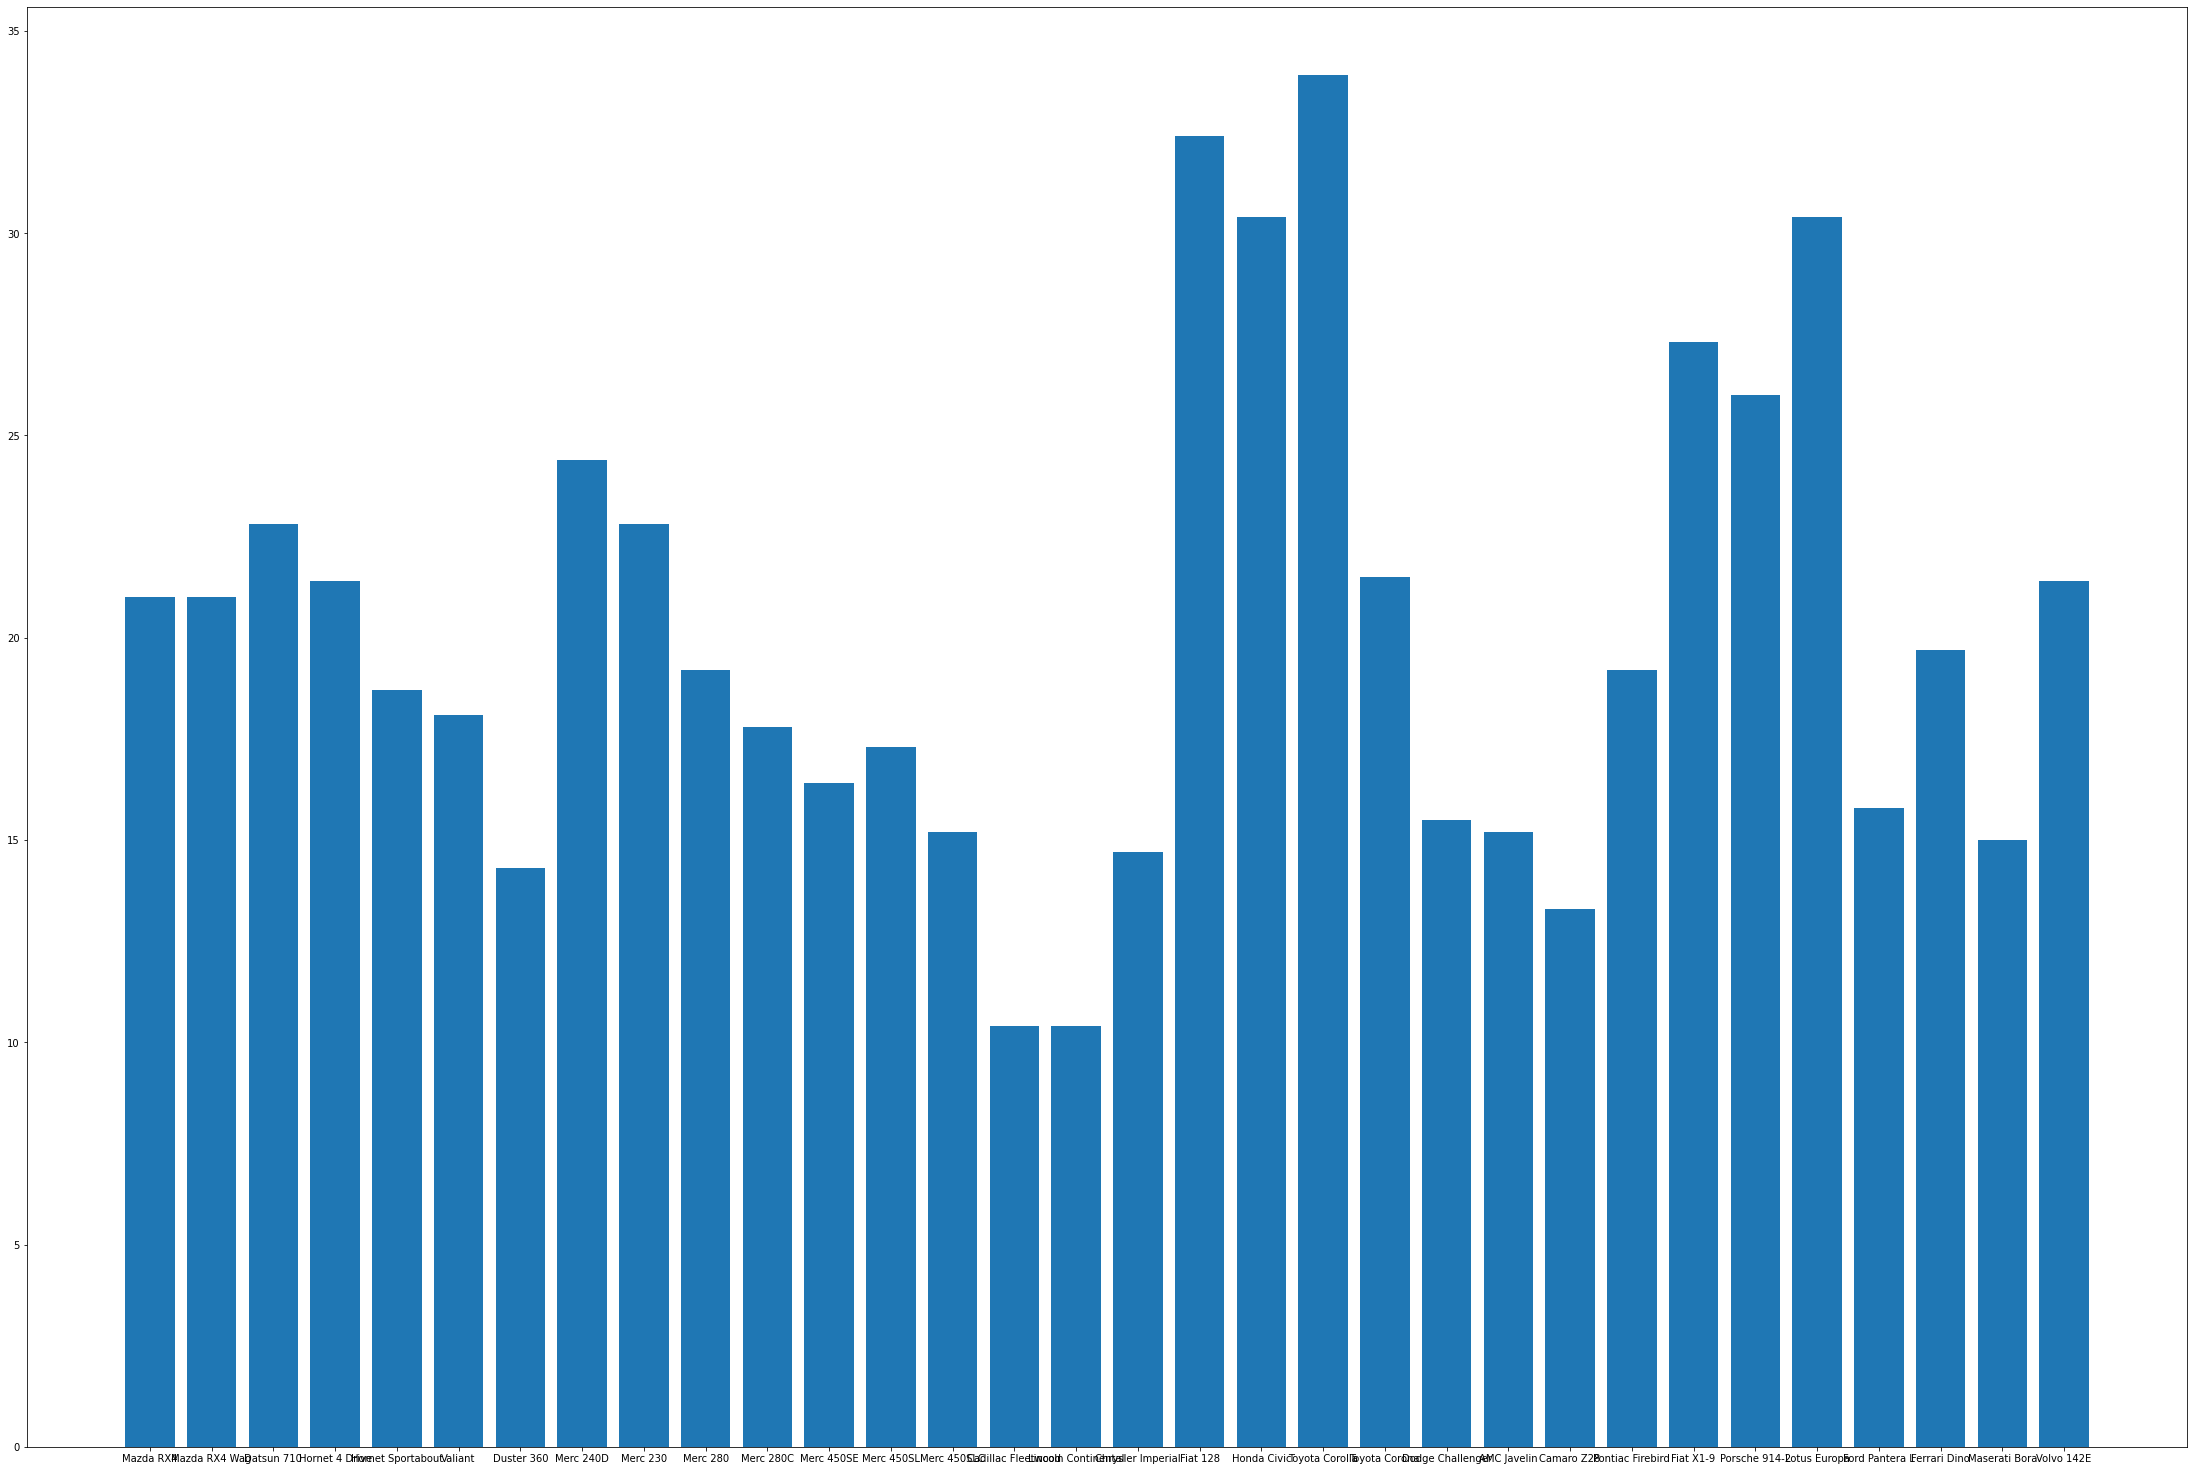

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["mpg"])
plt.show()

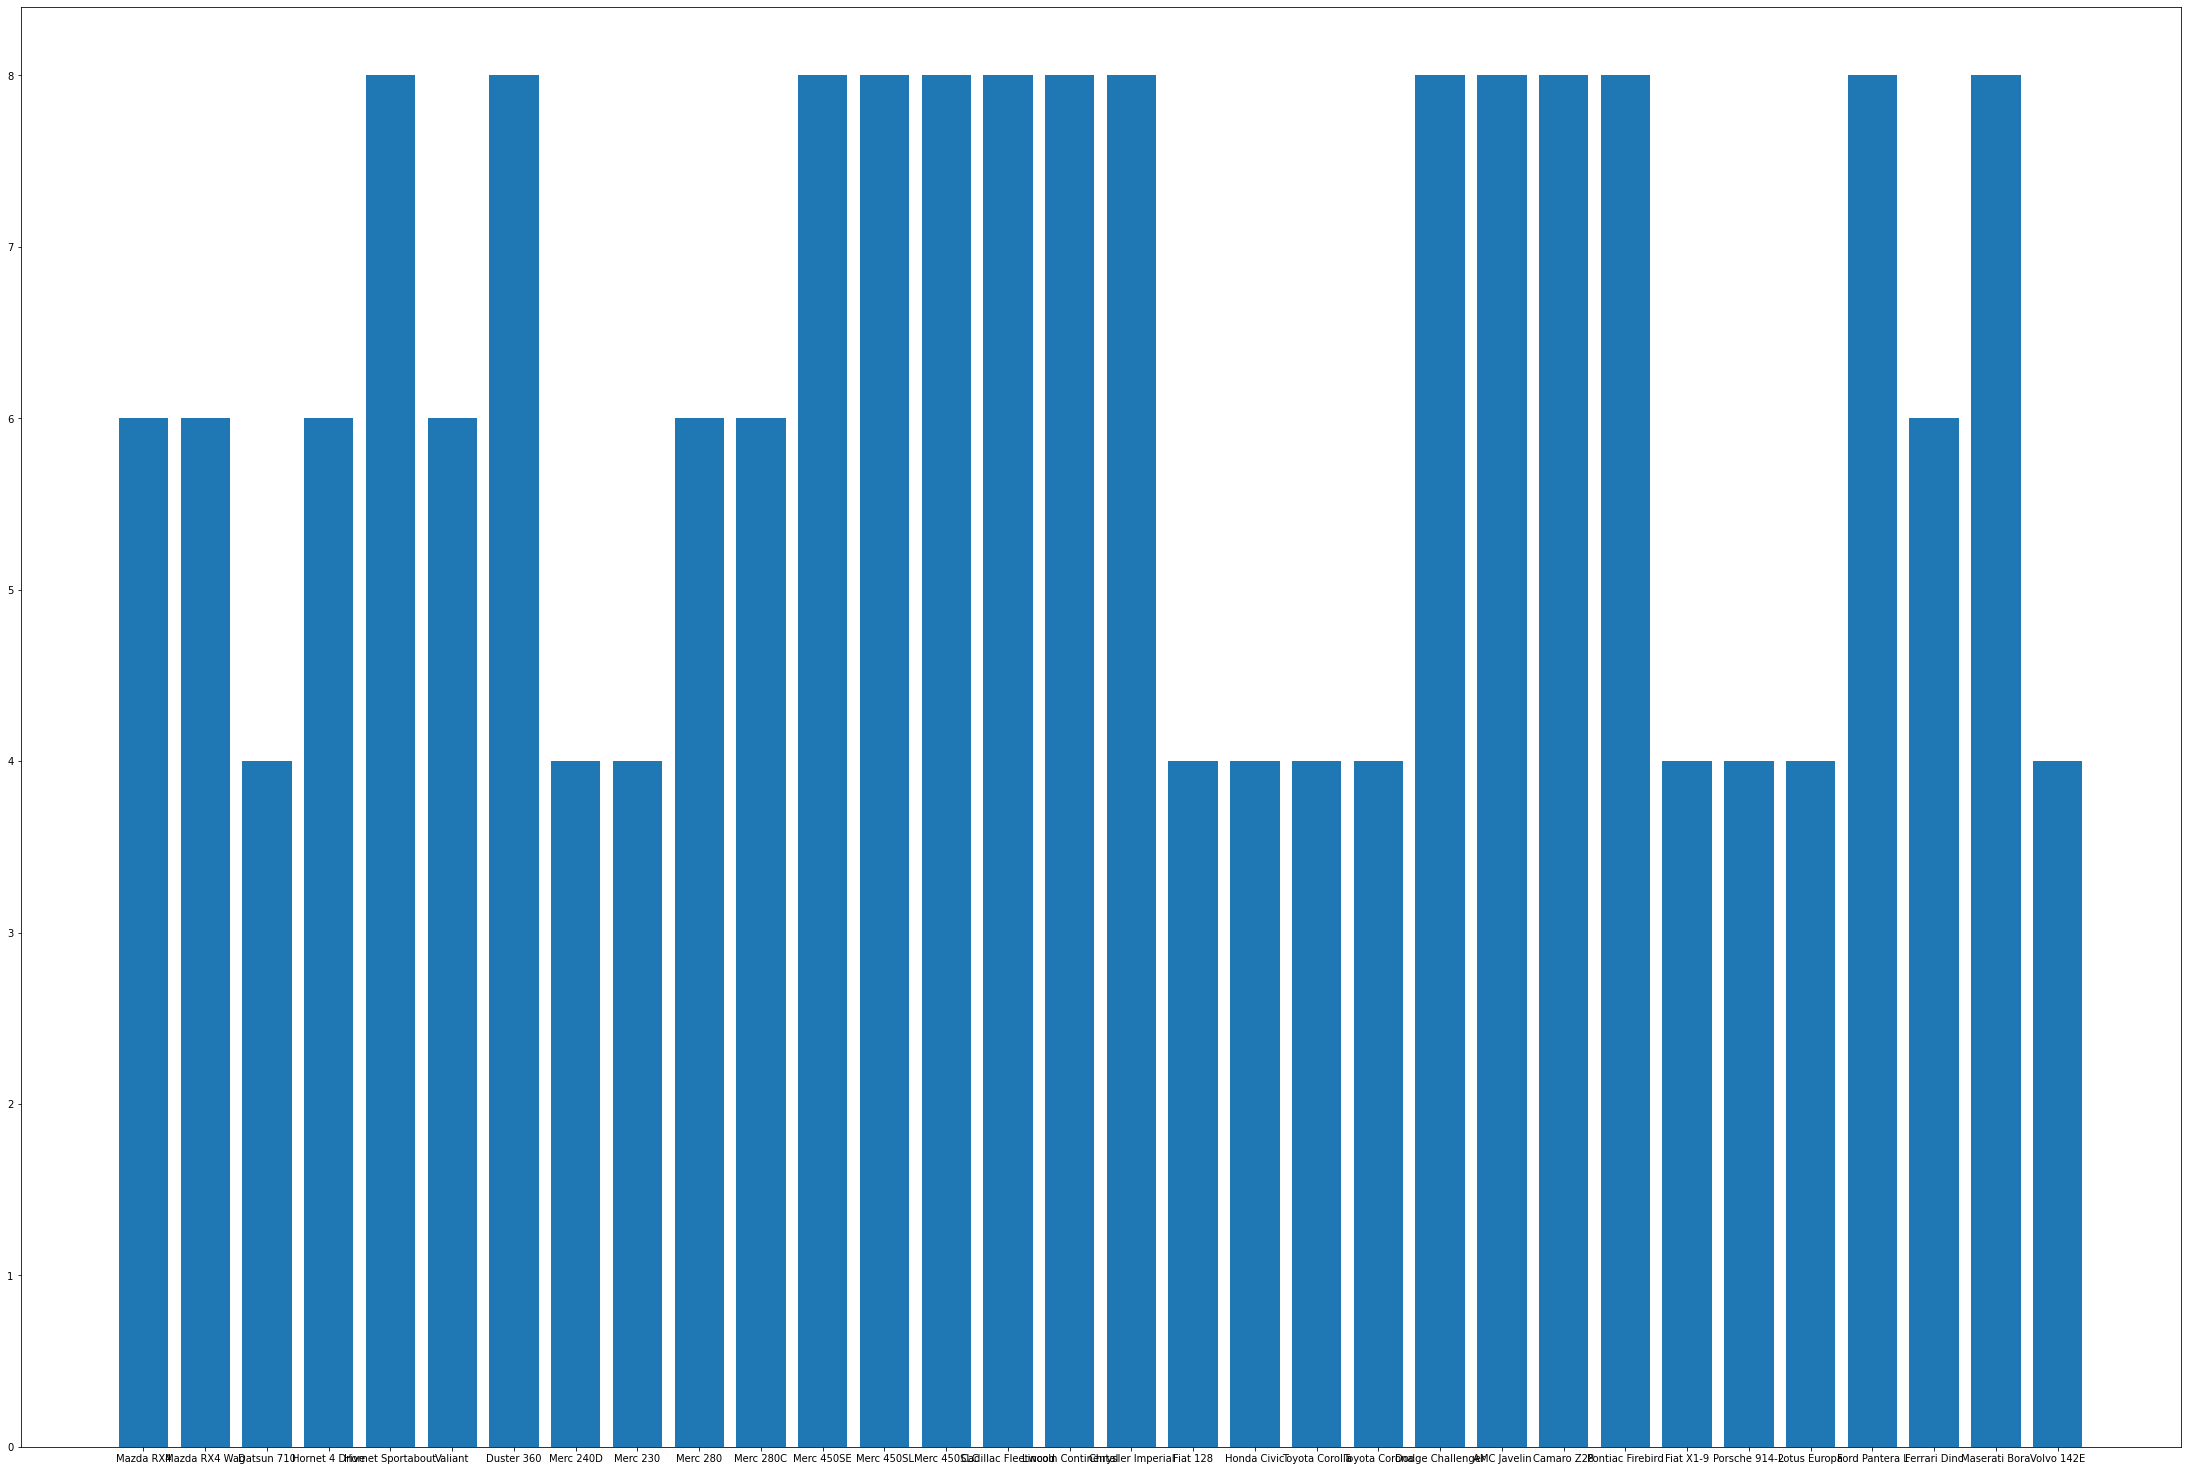

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["cyl"])
plt.show()

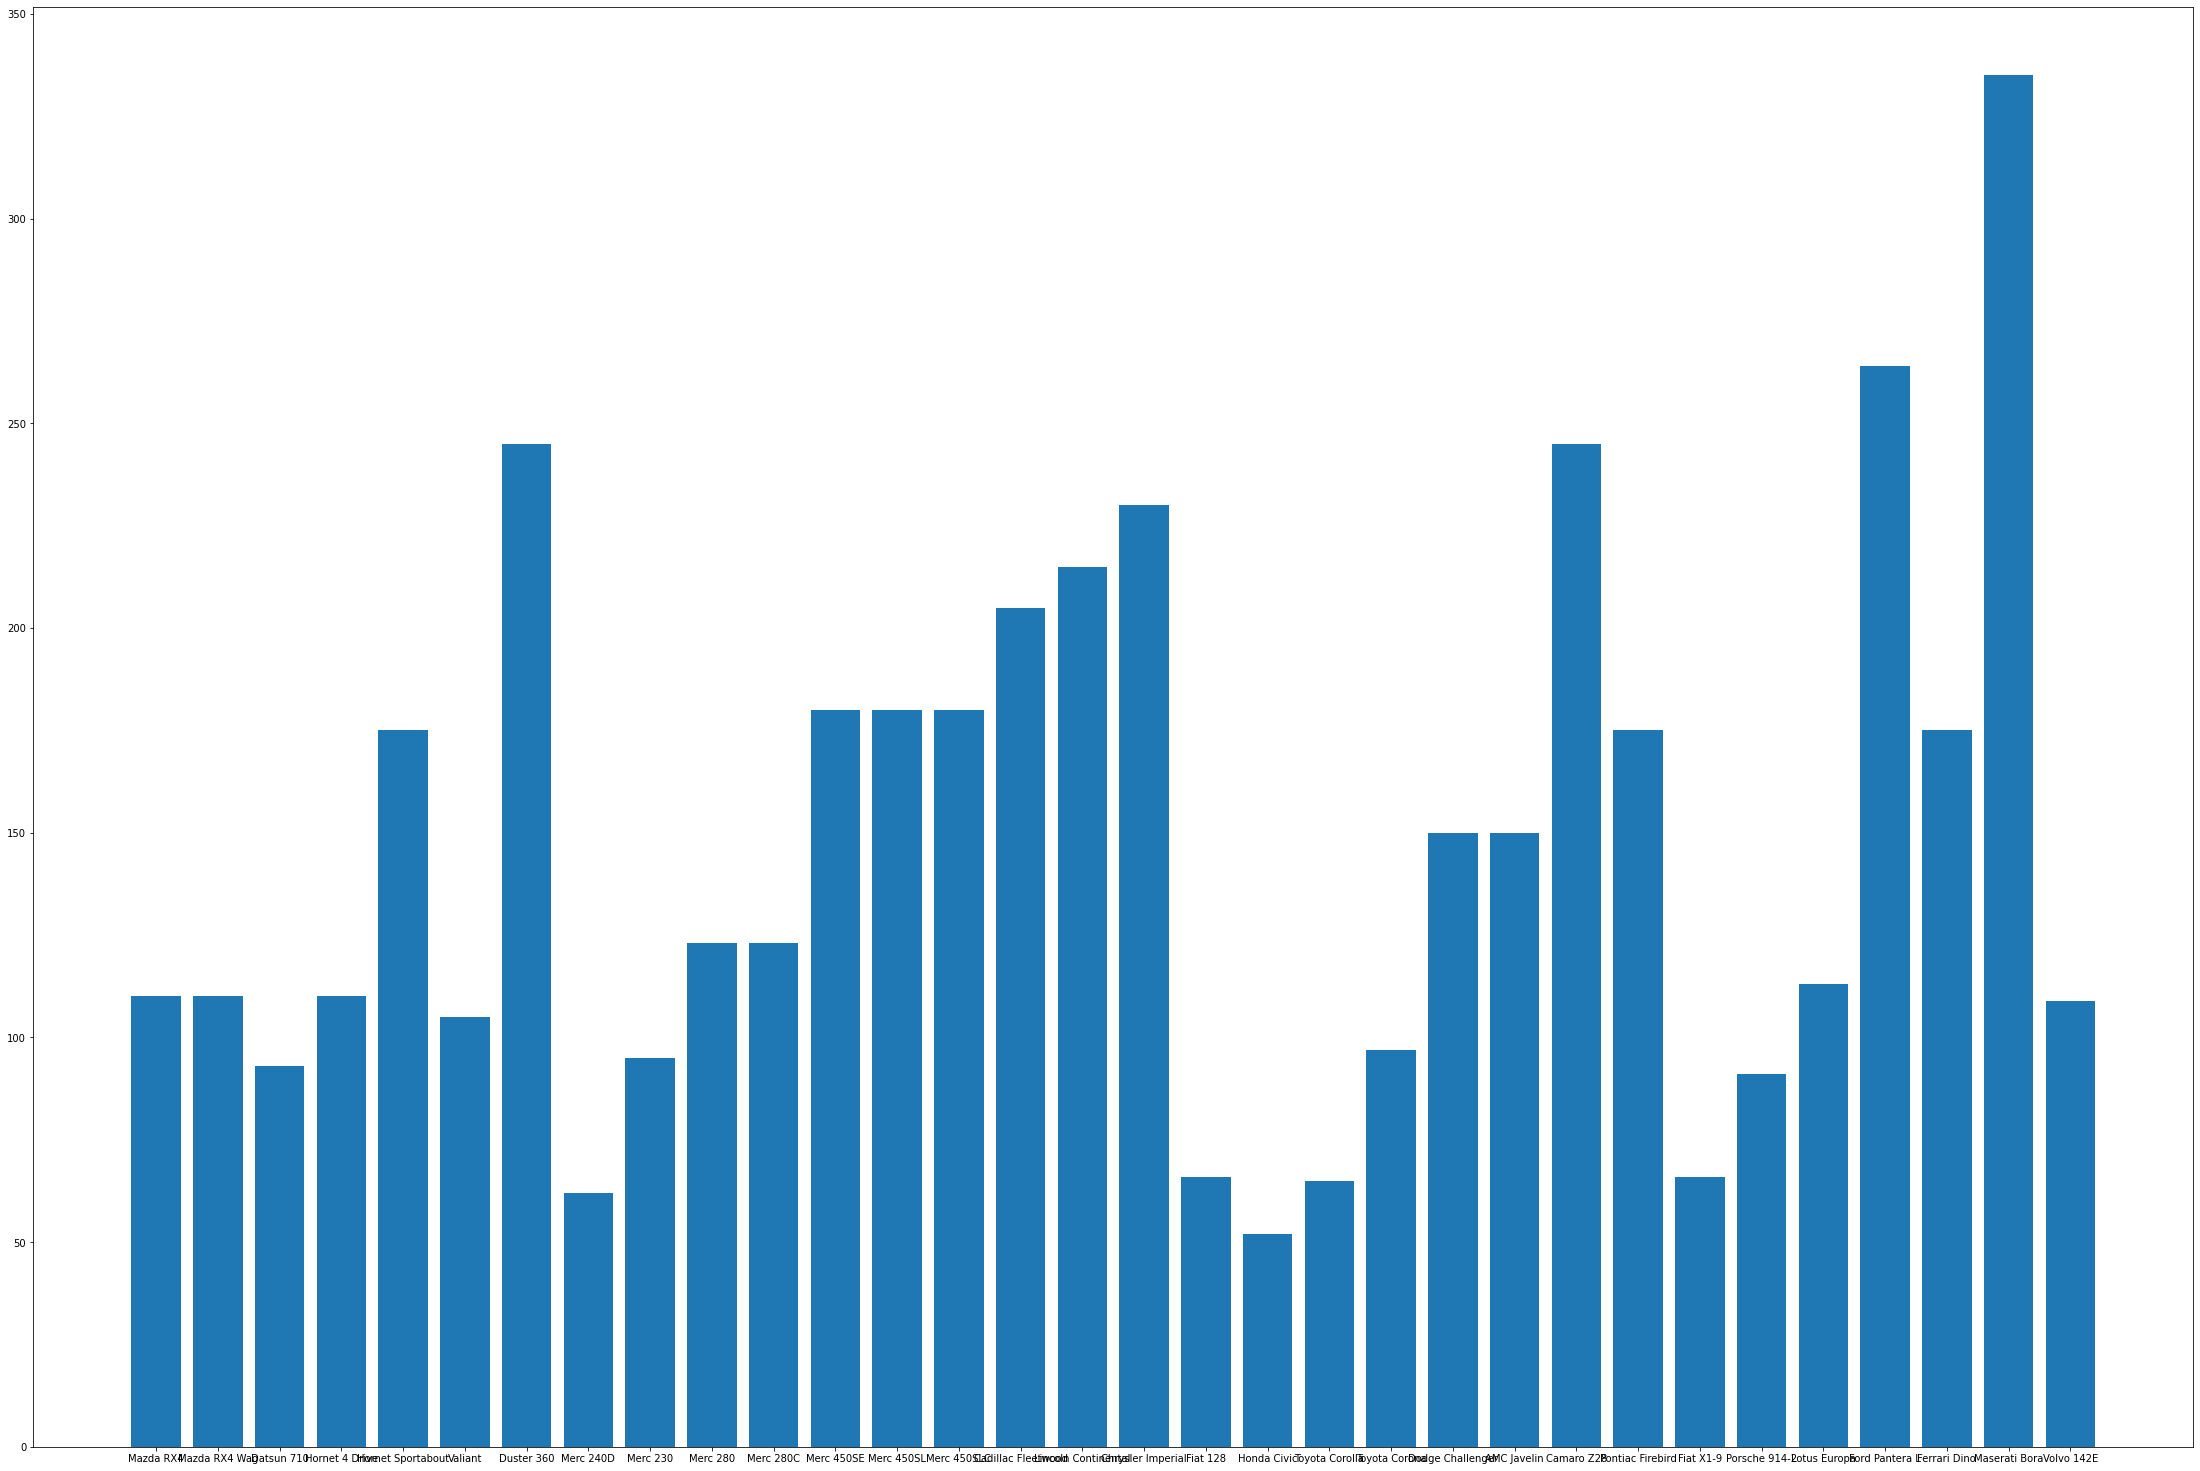

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["hp"])
plt.show()

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

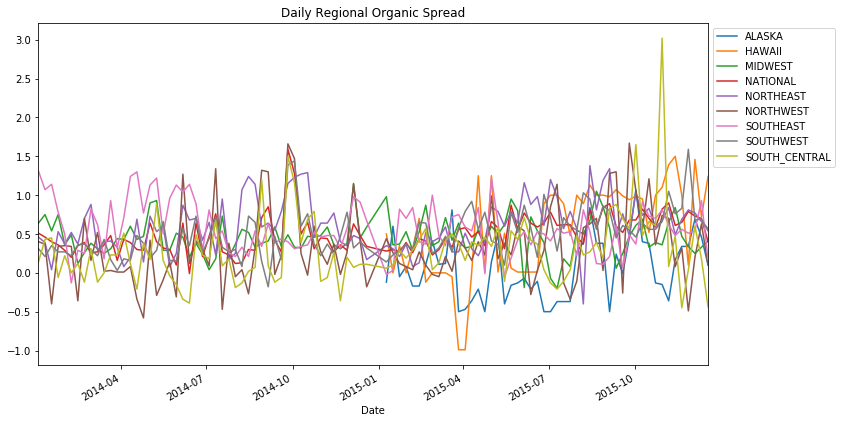

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


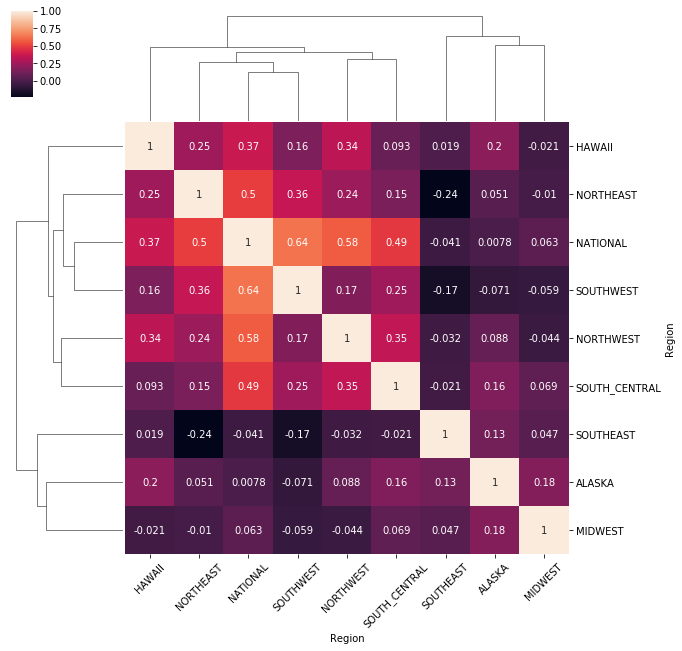

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Data Analysis Colombia example

In [9]:
evaluation = pd.read_csv("datosgov.csv")
evaluation

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,20,CESAR,20001,VALLEDUPAR,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,713,713,5704,8.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
1,20,CESAR,20400,LA JAGUA DE IBIRICO,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,430,430,2150,5.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
2,20,CESAR,20621,LA PAZ,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,300,300,3000,10.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
3,20,CESAR,20570,PUEBLO BELLO,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,105,103,830,8.06,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
4,20,CESAR,20770,SAN MARTIN,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,90,80,640,8.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,20,CESAR,20710,SAN ALBERTO,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2018,2018,60,60,600,10.00,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL
4883,20,CESAR,20250,EL PASO,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2018,2018,52,52,520,10.00,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL
4884,20,CESAR,20060,BOSCONIA,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2018,2018,31,31,223,7.15,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL
4885,20,CESAR,20517,PAILITAS,HORTALIZAS,ZANAHORIA,ZANAHORIA,ZANAHORIA,2017,2017A,20,20,20,1.00,HORTALIZA FRESCA,UMBELLIFERAE,TRANSITORIO


In [10]:
evaluation.dtypes

CÓD. \nDEP.                                        int64
DEPARTAMENTO                                      object
CÓD. MUN.                                          int64
MUNICIPIO                                         object
GRUPO \nDE CULTIVO                                object
SUBGRUPO \nDE CULTIVO                             object
CULTIVO                                           object
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO     object
AÑO                                                int64
PERIODO                                           object
Área Sembrada\n(ha)                                int64
Área Cosechada\n(ha)                               int64
Producción\n(t)                                    int64
Rendimiento\n(t/ha)                              float64
ESTADO FISICO PRODUCCION                          object
NOMBRE \nCIENTIFICO                               object
CICLO DE CULTIVO                                  object
dtype: object

In [14]:
frutas = evaluation[evaluation["GRUPO \nDE CULTIVO"] == "FRUTALES"]
frutas

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,20,CESAR,20001,VALLEDUPAR,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,713,713,5704,8.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
1,20,CESAR,20400,LA JAGUA DE IBIRICO,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,430,430,2150,5.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
2,20,CESAR,20621,LA PAZ,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,300,300,3000,10.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
3,20,CESAR,20570,PUEBLO BELLO,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,105,103,830,8.06,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
4,20,CESAR,20770,SAN MARTIN,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,90,80,640,8.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,20,CESAR,20013,AGUSTIN CODAZZI,FRUTALES,TOMATE DE ARBOL,TOMATE DE ARBOL,TOMATE DE ARBOL,2018,2018,55,55,550,10.00,FRUTO FRESCO,SOLAMUN BETACEUM,PERMANENTE
4593,20,CESAR,20400,LA JAGUA DE IBIRICO,FRUTALES,TOMATE DE ARBOL,TOMATE DE ARBOL,TOMATE DE ARBOL,2018,2018,36,36,288,8.00,FRUTO FRESCO,SOLAMUN BETACEUM,PERMANENTE
4594,20,CESAR,20045,BECERRIL,FRUTALES,TOMATE DE ARBOL,TOMATE DE ARBOL,TOMATE DE ARBOL,2018,2018,25,12,120,10.00,FRUTO FRESCO,SOLAMUN BETACEUM,PERMANENTE
4595,20,CESAR,20570,PUEBLO BELLO,FRUTALES,TOMATE DE ARBOL,TOMATE DE ARBOL,TOMATE DE ARBOL,2018,2018,15,11,77,7.00,FRUTO FRESCO,SOLAMUN BETACEUM,PERMANENTE


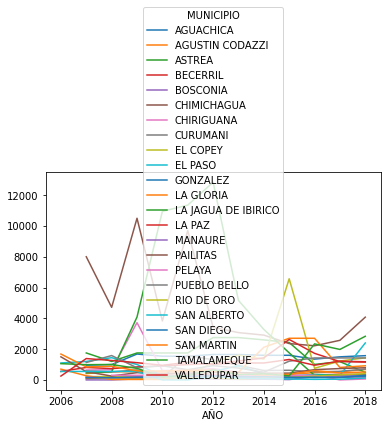

In [15]:
frutas.groupby(['AÑO', 'MUNICIPIO'])['Producción\n(t)'].mean().unstack().ffill().plot();

In [66]:
def fruit_spread(row):
    
    sembrada = row["Área Sembrada\n(ha)"]
    no_sembrada = row["Área Cosechada\n(ha)"]
    diff = sembrada - no_sembrada
    return diff

def spread_municipio(df):
    return df.set_index("AÑO").apply(lambda row: fruit_spread(row), axis=1)

In [69]:
spread_municipio(frutas)

AÑO
2007     0
2007     0
2007     0
2007     2
2007    10
        ..
2018     0
2018     0
2018    13
2018     4
2018     0
Length: 1041, dtype: int64

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!